**1. Import Necessary Libraries:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

**2. Load and Smooth Data:**


In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'  # Airline Passengers dataset (monthly)
data = pd.read_csv(url, usecols=[1], engine='python')
data = data.values.reshape(-1, 1)
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

**3. Preprocess Data:**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

**3. Create LSTM Data:**

In [ ]:
X, y = [], []
for i in range(10, len(data)):
    X.append(data[i-10:i])
    y.append(data[i])

X, y = np.array(X), np.array(y)

**4. Train/Test Spilt**

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


**5. Train Model:**

In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1238
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1021 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0691 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0412 
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160  
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0137
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093  
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088  
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms

**6. Forecast and Evaluate:**

In [ ]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


**7.Transform**

In [ ]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)


**8. Visualization:**

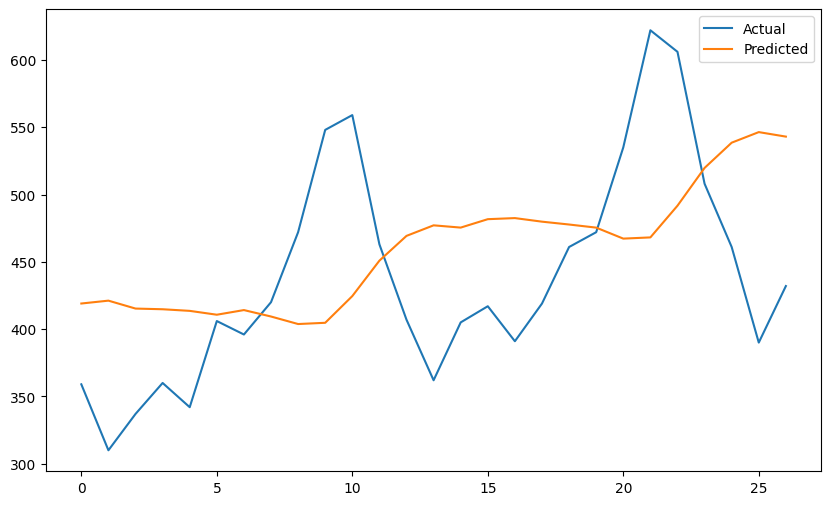

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1071
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0648 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0467
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0235
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0119
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0119
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0094
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0068
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━

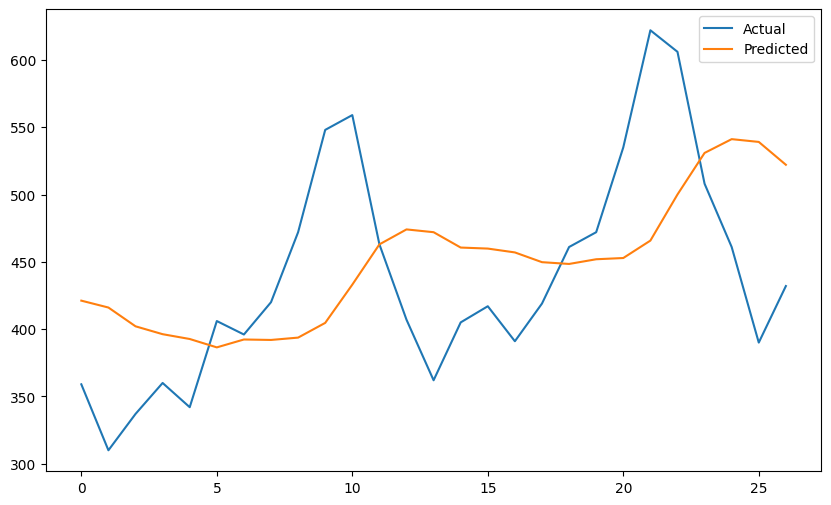

In [1]:
# prompt: Develop neural network-based time series forecasting model for a time series data.

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# **1. Import Necessary Libraries:** (Already imported)

# **2. Load and Smooth Data:** (Already loaded and reshaped)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'  # Airline Passengers dataset (monthly)
data = pd.read_csv(url, usecols=[1], engine='python')
data = data.values.reshape(-1, 1)


# **3. Preprocess Data:** (Already preprocessed)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# **3. Create LSTM Data:** (Already created)
X, y = [], []
for i in range(10, len(data)):
    X.append(data[i-10:i])
    y.append(data[i])

X, y = np.array(X), np.array(y)

# **4. Train/Test Spilt** (Already split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# **5. Train Model:** (Model training)
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16)

# **6. Forecast and Evaluate:** (Prediction)
predictions = model.predict(X_test)

# **7.Transform** (Inverse transform for visualization)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# **8. Visualization:**
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()
